In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
!pip install tensorflow torch numpy matplotlib nibabel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
base_path = "/content/drive/MyDrive/archive/BraTS2020_training_data/content/data/"

In [27]:
import h5py
import os

sample_file_path = os.path.join(base_path, "volume_351_slice_64.h5")  # Or any other .h5 file

image_data = None
mask_data = None

try:
    with h5py.File(sample_file_path, 'r') as hf:
        print("Keys in h5 file:", list(hf.keys()))  # Print the keys

        image_data = hf['image'][:]  # Read image data
        mask_data = hf['mask'][:]    # Read mask data

        print("Image data shape:", image_data.shape)
        print("Mask data shape:", mask_data.shape)

except FileNotFoundError:
    print(f"Error: File not found: {sample_file_path}")

# You can now use image_data and mask_data outside the try block (if they were read)
if image_data is not None:
    # Do something with image_data
    pass

Keys in h5 file: ['image', 'mask']
Image data shape: (240, 240, 4)
Mask data shape: (240, 240, 3)


In [28]:
print("Image data shape:", image_data.shape)

Image data shape: (240, 240, 4)


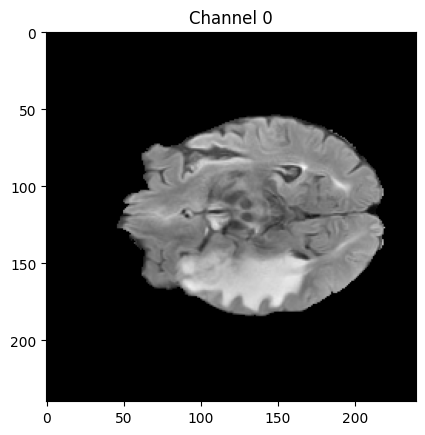

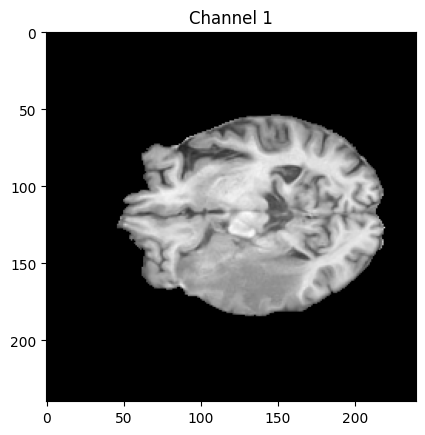

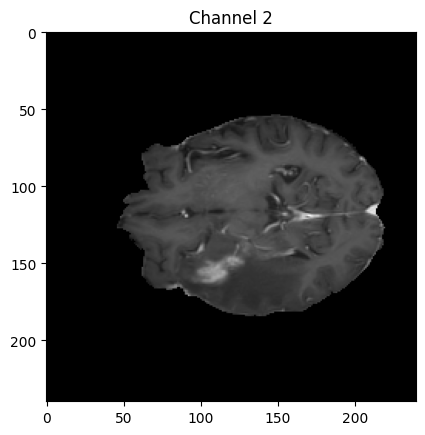

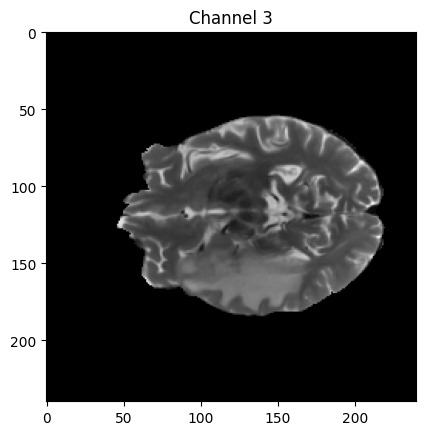

In [29]:
import matplotlib.pyplot as plt

# Assuming image_data has shape (height, width, channels)
for channel in range(image_data.shape[2]):
    plt.imshow(image_data[:, :, channel], cmap="gray")
    plt.title(f"Channel {channel}")
    plt.show()

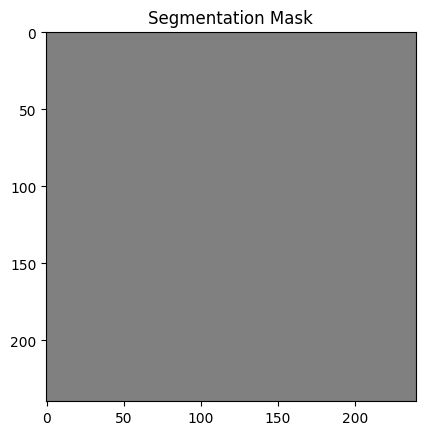

In [30]:
plt.imshow(mask_data, cmap="jet", alpha=0.5)
plt.title("Segmentation Mask")
plt.show()

In [17]:
import os
import random
import h5py
import numpy as np

base_path = "/content/drive/MyDrive/archive/BraTS2020_training_data/content/data/"

tumor_files = []  # List to store files with tumor presence
sample_size = 1000 #Adjust sample size as needed

all_files = [f for f in os.listdir(base_path) if f.endswith(".h5")]

sampled_files = random.sample(all_files, min(sample_size, len(all_files)))

for file_name in sampled_files:
    file_path = os.path.join(base_path, file_name)

    try:
        with h5py.File(file_path, 'r') as hf:
            mask_data = hf['mask'][:]

        # Check for non-zero mask values (tumor presence)
        unique_mask_values = np.unique(mask_data)
        if len(unique_mask_values) > 1:  # More than just background
            tumor_files.append(file_name)
            print(f"Tumor found in: {file_name}, unique mask values: {unique_mask_values}")
        else:
            print(f"No tumor in: {file_name}")

    except Exception as e:
        print(f"An error occurred: {e}")

print("\nFiles with potential tumor regions:")
print(tumor_files)
print(f"\n{len(tumor_files)} files out of {len(sampled_files)} files contain tumors.")

No tumor in: volume_165_slice_126.h5
No tumor in: volume_359_slice_13.h5
Tumor found in: volume_75_slice_84.h5, unique mask values: [0 1]
No tumor in: volume_291_slice_8.h5
No tumor in: volume_200_slice_8.h5
No tumor in: volume_103_slice_9.h5
No tumor in: volume_101_slice_22.h5
No tumor in: volume_361_slice_16.h5
Tumor found in: volume_80_slice_46.h5, unique mask values: [0 1]
No tumor in: volume_179_slice_107.h5
Tumor found in: volume_222_slice_100.h5, unique mask values: [0 1]
No tumor in: volume_154_slice_27.h5
Tumor found in: volume_152_slice_58.h5, unique mask values: [0 1]
Tumor found in: volume_351_slice_64.h5, unique mask values: [0 1]
No tumor in: volume_142_slice_6.h5
No tumor in: volume_153_slice_5.h5
No tumor in: volume_315_slice_35.h5
No tumor in: volume_114_slice_20.h5
Tumor found in: volume_296_slice_73.h5, unique mask values: [0 1]
No tumor in: volume_331_slice_129.h5
Tumor found in: volume_133_slice_127.h5, unique mask values: [0 1]
Tumor found in: volume_311_slice_118

In [18]:
tumor_volumes = []
for file_name in tumor_files:
    if 'volume_' in file_name:
        volume_id = file_name.split('volume_')[1].split('_slice_')[0]
        if volume_id not in tumor_volumes:
            tumor_volumes.append(volume_id)

print(tumor_volumes)

['75', '80', '222', '152', '351', '296', '133', '311', '145', '235', '72', '288', '270', '12', '366', '112', '359', '334', '20', '208', '96', '121', '267', '346', '266', '310', '161', '314', '358', '333', '22', '151', '184', '47', '307', '180', '131', '327', '335', '362', '169', '59', '115', '162', '354', '352', '54', '280', '44', '297', '126', '7', '124', '216', '144', '326', '81', '62', '61', '155', '365', '25', '360', '337', '312', '353', '236', '192', '274', '67', '84', '338', '183', '350', '299', '5', '117', '328', '214', '181', '166', '290', '368', '71', '228', '95', '87', '165', '4', '26', '11', '258', '45', '94', '27', '40', '86', '199', '289', '91', '42', '363', '218', '93', '85', '17', '110', '164', '369', '37', '69', '272', '66', '175', '213', '120', '282', '318', '257', '130', '245', '260', '226', '185', '154', '212', '24', '8', '254', '273', '237', '355', '98', '51', '77', '29', '193', '82', '343', '367', '148', '60', '323', '149', '191', '324', '298', '306', '1', '286', '

In [19]:
import os

file_path = "/content/drive/MyDrive/archive/BraTS2020_training_data/content/data/volume_128_slice_155.h5"
directory = os.path.dirname(file_path)

if os.path.exists(directory):
    print(f"Files in directory '{directory}':")
    for filename in os.listdir(directory):
        print(filename)
else:
    print(f"Directory '{directory}' does not exist.")

Streaming output truncated to the last 5000 lines.
volume_126_slice_143.h5
volume_126_slice_146.h5
volume_126_slice_135.h5
volume_126_slice_15.h5
volume_126_slice_126.h5
volume_126_slice_138.h5
volume_126_slice_13.h5
volume_126_slice_130.h5
volume_126_slice_139.h5
volume_126_slice_132.h5
volume_126_slice_42.h5
volume_126_slice_26.h5
volume_126_slice_31.h5
volume_126_slice_25.h5
volume_126_slice_3.h5
volume_126_slice_37.h5
volume_126_slice_16.h5
volume_126_slice_43.h5
volume_126_slice_24.h5
volume_126_slice_23.h5
volume_126_slice_35.h5
volume_126_slice_4.h5
volume_126_slice_27.h5
volume_126_slice_22.h5
volume_126_slice_39.h5
volume_126_slice_34.h5
volume_126_slice_33.h5
volume_126_slice_32.h5
volume_126_slice_44.h5
volume_126_slice_17.h5
volume_126_slice_41.h5
volume_126_slice_36.h5
volume_126_slice_29.h5
volume_126_slice_18.h5
volume_126_slice_20.h5
volume_126_slice_38.h5
volume_126_slice_40.h5
volume_126_slice_19.h5
volume_126_slice_2.h5
volume_126_slice_21.h5
volume_126_slice_28.h5
v

In [21]:
import h5py
file_path = "/content/drive/MyDrive/archive/BraTS2020_training_data/content/data/volume_1_slice_0.h5"

with h5py.File(file_path, 'r') as hf:
    print("Keys in the .h5 file:", list(hf.keys()))

Keys in the .h5 file: ['image', 'mask']


In [23]:
import h5py
import os
import numpy as np

data_dir = '/content/drive/MyDrive/archive/BraTS2020_training_data/content/data/'  # Correct data directory
selected_volume_id = '1'  # Choose a volume ID

#Data Loading
loaded_data = {}

for file_name in os.listdir(data_dir):
    if file_name.endswith('.h5') and f'volume_{selected_volume_id}_' in file_name:
        file_path = os.path.join(data_dir, file_name)
        with h5py.File(file_path, 'r') as hf:
            mri_data = np.array(hf['image'])  # Use 'image' key
            seg_mask = np.array(hf['mask'])   # Use 'mask' key
            loaded_data.setdefault(selected_volume_id, {'image': [], 'mask': []})
            loaded_data[selected_volume_id]['image'].append(mri_data)
            loaded_data[selected_volume_id]['mask'].append(seg_mask)

#Convert the lists to numpy arrays.
for volume_no in loaded_data:
    loaded_data[volume_no]['image'] = np.array(loaded_data[volume_no]['image'])
    loaded_data[volume_no]['mask'] = np.array(loaded_data[volume_no]['mask'])

def reconstruct_3d_volumes(loaded_data):
    reconstructed_volumes = {}
    for volume_id, data in loaded_data.items():
        z_dim = data['image'].shape[0]
        y_dim = data['image'].shape[1]
        x_dim = data['image'].shape[2]

        reconstructed_volumes[volume_id] = {
            'image': np.zeros((z_dim, y_dim, x_dim, data['image'].shape[3])),
            'mask': np.zeros((z_dim, y_dim, x_dim))
        }

        for i in range(z_dim):
            reconstructed_volumes[volume_id]['image'][i] = data['image'][i]
            reconstructed_volumes[volume_id]['mask'][i] = data['mask'][i][:,:,0] # Take the first channel of the mask.

    return reconstructed_volumes

reconstructed_data = reconstruct_3d_volumes(loaded_data)

print(reconstructed_data[selected_volume_id]['image'].shape)
print(reconstructed_data[selected_volume_id]['mask'].shape)

(155, 240, 240, 4)
(155, 240, 240)


In [31]:
import numpy as np

#Preprocessing
def preprocess_volume(reconstructed_data):
    """
    Normalizes the MRI data using z-score normalization.

    Args:
        reconstructed_data: A dictionary containing the reconstructed MRI data and mask.

    Returns:
        A dictionary containing the normalized MRI data and the original mask.
    """

    mri_data = reconstructed_data['1']['image']
    mask_data = reconstructed_data['1']['mask']

    # Z-score normalization for each channel of the MRI data.
    normalized_mri_data = np.zeros_like(mri_data, dtype=np.float32)
    for channel in range(mri_data.shape[-1]):  # Iterate over channels
        channel_data = mri_data[..., channel]
        mean = np.mean(channel_data)
        std = np.std(channel_data)
        if std != 0:  # Avoid division by zero
            normalized_mri_data[..., channel] = (channel_data - mean) / std
        else:
            normalized_mri_data[..., channel] = channel_data  # Keep original if std is 0

    return {'image': normalized_mri_data, 'mask': mask_data}

#Preprocess the data.
preprocessed_data = preprocess_volume(reconstructed_data)

print(preprocessed_data['image'].shape)
print(preprocessed_data['mask'].shape)
print(f'MRI data mean: {np.mean(preprocessed_data["image"])}')
print(f'MRI data std: {np.std(preprocessed_data["image"])}')

(155, 240, 240, 4)
(155, 240, 240)
MRI data mean: 3.0080049562286604e-10
MRI data std: 1.0000014305114746


In [32]:
import tensorflow as tf
from tensorflow.keras import layers

def build_3d_unet(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder (Downsampling)
    conv1 = layers.Conv3D(32, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv3D(32, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling3D(pool_size=(2, 2, 2))(conv1)

    conv2 = layers.Conv3D(64, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv3D(64, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling3D(pool_size=(2, 2, 2))(conv2)

    # Bottleneck
    conv3 = layers.Conv3D(128, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv3D(128, 3, activation='relu', padding='same')(conv3)

    # Decoder (Upsampling)
    up4 = layers.Conv3DTranspose(64, 2, strides=(2, 2, 2), padding='same')(conv3)
    concat4 = layers.concatenate([up4, conv2], axis=-1)
    conv4 = layers.Conv3D(64, 3, activation='relu', padding='same')(concat4)
    conv4 = layers.Conv3D(64, 3, activation='relu', padding='same')(conv4)

    up5 = layers.Conv3DTranspose(32, 2, strides=(2, 2, 2), padding='same')(conv4)
    concat5 = layers.concatenate([up5, conv1], axis=-1)
    conv5 = layers.Conv3D(32, 3, activation='relu', padding='same')(concat5)
    conv5 = layers.Conv3D(32, 3, activation='relu', padding='same')(conv5)

    # Output layer
    outputs = layers.Conv3D(1, 1, activation='sigmoid')(conv5)  # 1 channel for segmentation mask

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Build the model
input_shape = (152, 240, 240, 4)  # Adjusted input shape
model = build_3d_unet(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy') #Example loss.

#Print model summary.
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 152, 240, 240,  │              0 │ -                      │
│                           │ 4)                     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d (Conv3D)           │ (None, 152, 240, 240,  │          3,488 │ input_layer[0][0]      │
│                           │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_1 (Conv3D)         │ (None, 152, 240, 240,  │         27,680 │ conv3d[0][0]           │
│                           │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d             │ (None, 76, 120, 120,   │              0 │ conv3d_1[0][0]         │
│ (MaxPooling3D)            │ 32)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_2 (Conv3D)         │ (None, 76, 120, 120,   │         55,360 │ max_pooling3d[0][0]    │
│                           │ 64)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_3 (Conv3D)         │ (None, 76, 120, 120,   │        110,656 │ conv3d_2[0][0]         │
│                           │ 64)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling3d_1           │ (None, 38, 60, 60, 64) │              0 │ conv3d_3[0][0]         │
│ (MaxPooling3D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_4 (Conv3D)         │ (None, 38, 60, 60,     │        221,312 │ max_pooling3d_1[0][0]  │
│                           │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_5 (Conv3D)         │ (None, 38, 60, 60,     │        442,496 │ conv3d_4[0][0]         │
│                           │ 128)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_transpose          │ (None, 76, 120, 120,   │         65,600 │ conv3d_5[0][0]         │
│ (Conv3DTranspose)         │ 64)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 76, 120, 120,   │              0 │ conv3d_transpose[0][0… │
│                           │ 128)                   │                │ conv3d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_6 (Conv3D)         │ (None, 76, 120, 120,   │        221,248 │ concatenate[0][0]      │
│                           │ 64)                    │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv3d_7 (Conv3D)         │ (None, 76, 120, 120,   │        110,656 │ conv3d_6[0][0]         │
│                           │ 64)                    │                │                        │
├──────────────────────

 Total params: 1,357,953 (5.18 MB)

 Trainable params: 1,357,953 (5.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import backend as K

# Mock data (replace with your actual data loading)
def generate_mock_data(num_volumes, z_dim, y_dim, x_dim, channels):
    mri_data = np.random.rand(num_volumes, z_dim, y_dim, x_dim, channels).astype(np.float32)
    mask_data = np.random.randint(0, 2, (num_volumes, z_dim, y_dim, x_dim, 1)).astype(np.float32)
    return mri_data, mask_data

num_volumes = 10  # Example number of volumes
z_dim = 152
y_dim = 240
x_dim = 240
channels = 4

mri_data, mask_data = generate_mock_data(num_volumes, z_dim, y_dim, x_dim, channels)

# Split into training and validation sets
train_ratio = 0.8
split_index = int(num_volumes * train_ratio)

train_mri = mri_data[:split_index]
train_mask = mask_data[:split_index]
val_mri = mri_data[split_index:]
val_mask = mask_data[split_index:]

# 3D U-Net Model Definition
def unet_3d(input_shape):
    inputs = layers.Input(input_shape)

    # Encoder
    conv1 = layers.Conv3D(32, 3, activation='relu', padding='same')(inputs)
    conv1 = layers.Conv3D(32, 3, activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling3D(pool_size=(2, 2, 2))(conv1)

    conv2 = layers.Conv3D(64, 3, activation='relu', padding='same')(pool1)
    conv2 = layers.Conv3D(64, 3, activation='relu', padding='same')(conv2)
    pool2 = layers.MaxPooling3D(pool_size=(2, 2, 2))(conv2)

    conv3 = layers.Conv3D(128, 3, activation='relu', padding='same')(pool2)
    conv3 = layers.Conv3D(128, 3, activation='relu', padding='same')(conv3)
    pool3 = layers.MaxPooling3D(pool_size=(2, 2, 2))(conv3)

    # Bottleneck
    conv4 = layers.Conv3D(256, 3, activation='relu', padding='same')(pool3)
    conv4 = layers.Conv3D(256, 3, activation='relu', padding='same')(conv4)

    # Decoder
    up5 = layers.Conv3DTranspose(128, 2, strides=(2, 2, 2), padding='same')(conv4)
    merge5 = layers.concatenate([up5, conv3], axis=4)
    conv5 = layers.Conv3D(128, 3, activation='relu', padding='same')(merge5)
    conv5 = layers.Conv3D(128, 3, activation='relu', padding='same')(conv5)

    up6 = layers.Conv3DTranspose(64, 2, strides=(2, 2, 2), padding='same')(conv5)
    merge6 = layers.concatenate([up6, conv2], axis=4)
    conv6 = layers.Conv3D(64, 3, activation='relu', padding='same')(merge6)
    conv6 = layers.Conv3D(64, 3, activation='relu', padding='same')(conv6)

    up7 = layers.Conv3DTranspose(32, 2, strides=(2, 2, 2), padding='same')(conv6)
    merge7 = layers.concatenate([up7, conv1], axis=4)
    conv7 = layers.Conv3D(32, 3, activation='relu', padding='same')(merge7)
    conv7 = layers.Conv3D(32, 3, activation='relu', padding='same')(conv7)

    # Output
    outputs = layers.Conv3D(1, 1, activation='sigmoid')(conv7)

    return tf.keras.Model(inputs=inputs, outputs=outputs)

# Dice Loss and Dice Coefficient
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

# Model Compilation
input_shape = (z_dim, y_dim, x_dim, channels)
model = unet_3d(input_shape)
model.compile(optimizer='adam', loss=dice_loss, metrics=[dice_coefficient])

# Model Training
history = model.fit(train_mri, train_mask, validation_data=(val_mri, val_mask), epochs=10, batch_size=2)

# Model Evaluation
evaluation = model.evaluate(val_mri, val_mask)
print(f"Validation loss: {evaluation[0]}, Validation Dice: {evaluation[1]}")

Epoch 1/10
